Pymaceuticals Inc.

In [173]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# dataframes share Mouse ID, merge on right to match pymaceuticals starter
metadata_study_merged_df = pd.merge(mouse_metadata,study_results,on="Mouse ID",how="right")

# Display the data table for preview
metadata_study_merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [174]:
# Checking the number of mice.
# unique count to match pymaceuticals starter
metadata_study_merged_df["Mouse ID"].nunique()

249

In [175]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#Code for finding rows with 2 duplicated columns found at
#https://www.geeksforgeeks.org/find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns/ 
duplicate_rows = metadata_study_merged_df[metadata_study_merged_df.duplicated(["Mouse ID","Timepoint"])]
duplicate_rows["Mouse ID"].unique()

array(['g989'], dtype=object)

In [176]:
# Optional: Get all the data for the duplicate mouse ID.
g989_data = metadata_study_merged_df[(metadata_study_merged_df["Mouse ID"]=="g989")]
g989_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [177]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
metadata_study_merged_df = metadata_study_merged_df[(metadata_study_merged_df["Mouse ID"]!="g989")]
metadata_study_merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [178]:
# Checking the number of mice in the clean DataFrame.
metadata_study_merged_df["Mouse ID"].nunique()

248

Summary Statistics

In [179]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen_stats = metadata_study_merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
mean = drug_regimen_stats.mean()
median = drug_regimen_stats.median()
var = drug_regimen_stats.var()
std = drug_regimen_stats.std()
sem = drug_regimen_stats.sem()

drug_regimen_df = pd.DataFrame({"Mean Tumor Volume":mean,
                                "Median Tumor Volume":median,
                                "Tumor Volume Variance":var,
                                "Tumor Volume Std. Dev.":std,
                                "Tumor Volume Std. Err.":sem})
drug_regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [180]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#.agg parameter requirements found at
#https://www.w3schools.com/python/pandas/ref_df_agg.asp

aggregate_drug_regimen = metadata_study_merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(func=["mean","median","var","std","sem"])
aggregate_drug_regimen

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

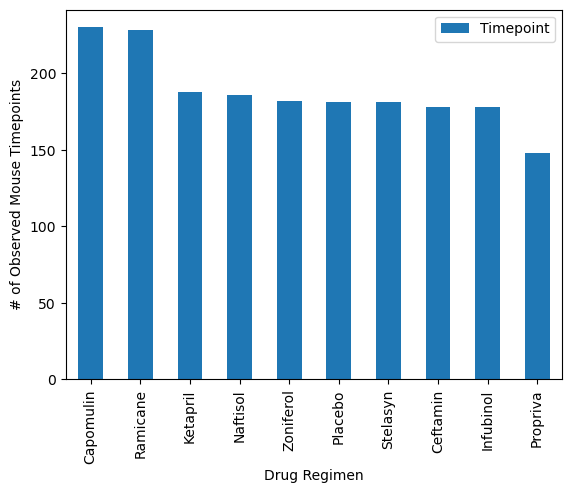

In [181]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#code for changing index to column
#https://stackoverflow.com/questions/21767900/how-to-move-pandas-data-from-index-to-column-after-multiple-groupby
#Sorting Code
#https://stackoverflow.com/questions/37787698/how-to-sort-pandas-dataframe-from-one-column

#Find count of total timepoints ber drug regimen name and plot
timepoint_data_pd = metadata_study_merged_df.groupby("Drug Regimen")["Timepoint"].count()
timepoint_bar_df = pd.DataFrame(timepoint_data_pd).sort_values(by="Timepoint",ascending=False).reset_index()

timepoint_bar_df.plot(kind="bar",x="Drug Regimen",y="Timepoint",
                      xlabel="Drug Regimen",ylabel="# of Observed Mouse Timepoints")
                                        

<BarContainer object of 10 artists>

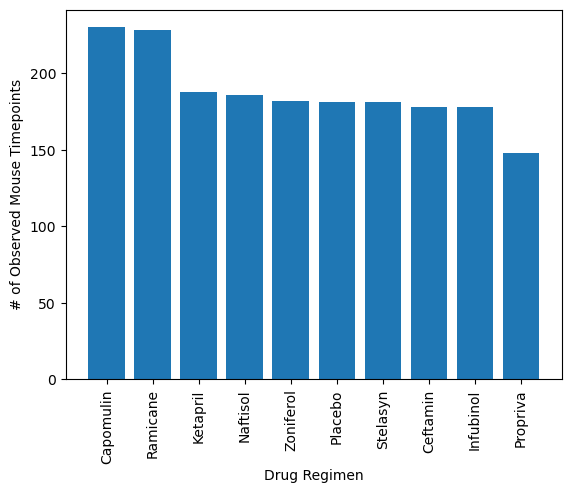

In [182]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#Find count of total timepoints ber drug regimen name and plot
timepoint_data_pyplot = metadata_study_merged_df.groupby("Drug Regimen")["Timepoint"].count()
timepoint_bar_pyplot_df = pd.DataFrame(timepoint_data_pyplot).sort_values(by="Timepoint",ascending=False).reset_index()
x=timepoint_bar_pyplot_df["Drug Regimen"].to_list()
y=timepoint_bar_pyplot_df["Timepoint"].to_list()
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.bar(x,y)

<Axes: ylabel='Sex'>

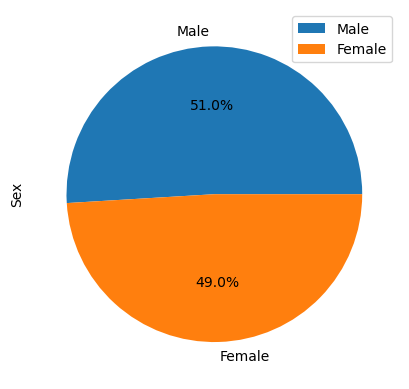

In [183]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#autopct format
#https://stackoverflow.com/questions/21090316/plotting-pandas-dataframes-in-to-pie-charts-using-matplotlib
#find count of mouse ids by sex
sex_groups_pdplot = metadata_study_merged_df.groupby("Sex")["Mouse ID"].count()
sex_df_pdplot = pd.DataFrame(sex_groups_pdplot).sort_values(by="Mouse ID",ascending=False)
sex_pie_pdplot=sex_df_pdplot.plot(kind="pie",y="Mouse ID",autopct='%1.1f%%',ylabel="Sex")
sex_pie_pdplot

([<matplotlib.patches.Wedge at 0x7f9726eabaf0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

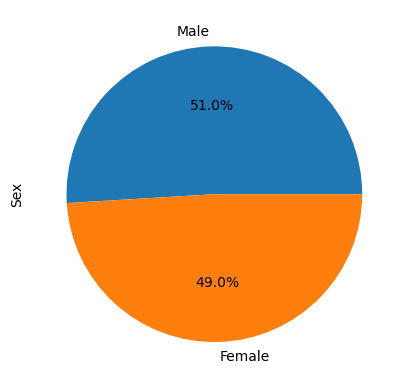

In [184]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_groups_pyplot = metadata_study_merged_df.groupby("Sex")["Mouse ID"].count()
sex_df_pyplot = pd.DataFrame(sex_groups_pyplot).sort_values(by="Mouse ID",ascending=False).reset_index()
labels = sex_df_pyplot["Sex"].to_list()
sex_counts = sex_df_pyplot["Mouse ID"].to_list()
plt.ylabel("Sex")
plt.pie(sex_counts,labels=labels,autopct='%1.1f%%')

Quartiles, Outliers and Box Plots

In [185]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time = pd.DataFrame(metadata_study_merged_df.groupby("Mouse ID")["Timepoint"].max().reset_index())
last_time=last_time.rename(columns={"Timepoint":"Last Timepoint"})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_time_merged_df = pd.merge(metadata_study_merged_df,last_time,on="Mouse ID",how="left")
last_time_only_df = last_time_merged_df[(last_time_merged_df["Timepoint"] == last_time_merged_df["Last Timepoint"])]
last_time_only_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
1,f932,Ketapril,Male,15,29,0,45.000000,0,0
20,x336,Naftisol,Female,4,29,0,45.000000,0,0
53,h428,Ketapril,Female,1,27,0,45.000000,0,0
55,v199,Naftisol,Female,17,29,0,45.000000,0,0
108,o848,Stelasyn,Female,14,27,0,45.000000,0,0
...,...,...,...,...,...,...,...,...,...
1875,r944,Capomulin,Male,12,25,45,41.581521,2,45
1876,u364,Capomulin,Male,18,17,45,31.023923,3,45
1877,p438,Ceftamin,Female,11,26,45,61.433892,1,45
1878,x773,Placebo,Female,21,30,45,58.634971,4,45


In [186]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    filtered_df = last_time_only_df[(last_time_only_df["Drug Regimen"] == i)]
    filtered_df = filtered_df[["Drug Regimen","Tumor Volume (mm3)"]].reset_index()
    # add subset 
    tumor_vol_list.append(filtered_df["Tumor Volume (mm3)"].values)
    # Determine outliers using upper and lower bounds
    quartiles = filtered_df["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - 1.5*iqr
    upper_bound = upperq + 1.5*iqr
    potential_outliers = filtered_df[(filtered_df["Tumor Volume (mm3)"]>upper_bound) | (filtered_df["Tumor Volume (mm3)"]<lower_bound)]
    print(f"{i}'s potential outliers: {potential_outliers['Tumor Volume (mm3)']}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 0    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

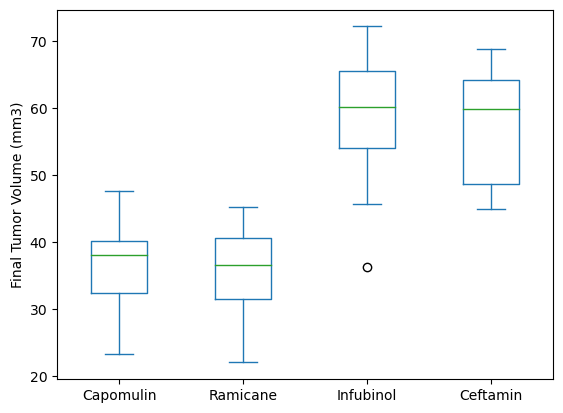

In [187]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# code for dataframe box plot
# https://www.tutorialspoint.com/plot-multiple-boxplots-in-one-graph-in-pandas-or-matplotlib
boxplot_df = pd.DataFrame({drug_list[0]:tumor_vol_list[0],drug_list[1]:tumor_vol_list[1],drug_list[2]:tumor_vol_list[2],drug_list[3]:tumor_vol_list[3]})
ax = boxplot_df.plot(kind="box")
ax.set_ylabel("Final Tumor Volume (mm3)")

Line and Scatter plots

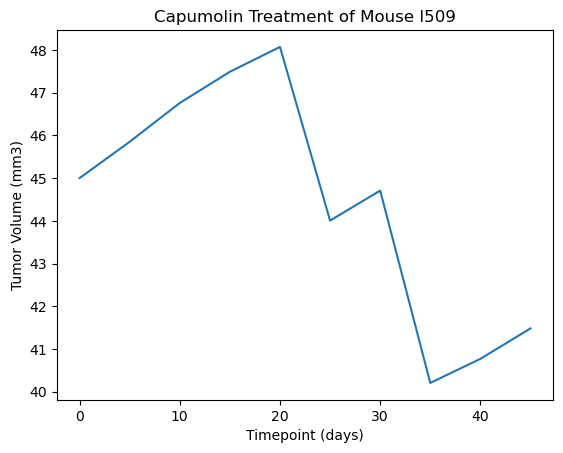

In [188]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#l509 to match pymaceuticals starter
line_df = metadata_study_merged_df[(metadata_study_merged_df["Mouse ID"] == "l509")]
plt.title("Capumolin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(line_df["Timepoint"],line_df["Tumor Volume (mm3)"])

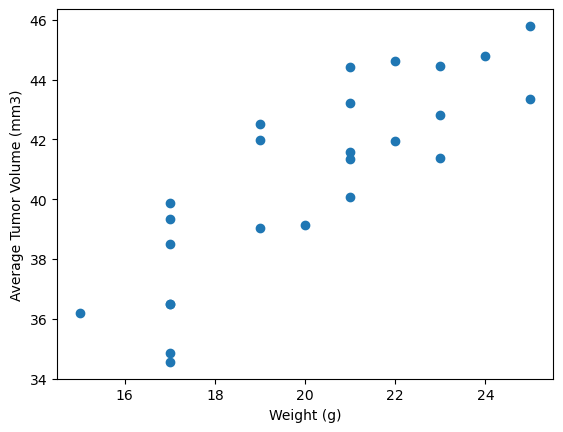

In [189]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_df_filter= metadata_study_merged_df[(metadata_study_merged_df["Drug Regimen"] == "Capomulin")]
avg_tumor_vol = pd.DataFrame(scatter_df_filter.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()).reset_index()
avg_tumor_vol = avg_tumor_vol.rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume"})
#reduce dataframe to unique mouse ID and their average tumor volume
scatter_df = pd.merge(scatter_df_filter,avg_tumor_vol,on="Mouse ID",how="left")
scatter_df = scatter_df.drop(["Tumor Volume (mm3)","Timepoint"],axis="columns")
scatter_df = scatter_df.drop_duplicates(subset="Mouse ID")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(x=scatter_df["Weight (g)"],y=scatter_df["Average Tumor Volume"])

The correlation between mouse weight and the average tumor volume is 0.84


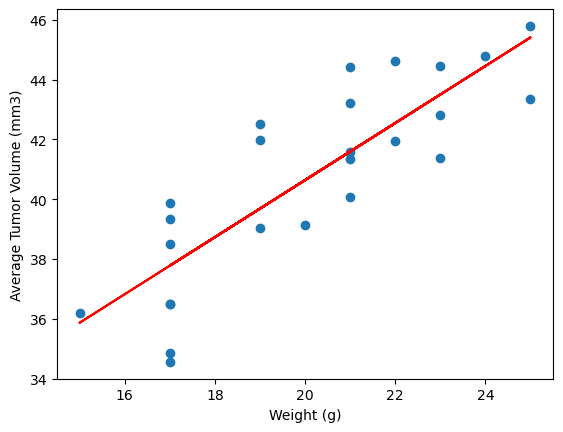

In [190]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(scatter_df["Average Tumor Volume"],scatter_df["Weight (g)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(x=scatter_df["Weight (g)"],y=scatter_df["Average Tumor Volume"])
#Line of best fit code from class 5.3 correlations.ipynb
(slope,intercept,r,p,stderr)=st.linregress(scatter_df["Weight (g)"],scatter_df["Average Tumor Volume"])
regress_vals = scatter_df["Weight (g)"]*slope + intercept
plt.plot(scatter_df["Weight (g)"],regress_vals,"r-")